In [2]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
import kagglehub
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
print("Path to dataset files:", path)
file_path = os.path.join(path, "diabetes.csv")
df = pd.read_csv(file_path)


Path to dataset files: /kaggle/input/pima-indians-diabetes-database


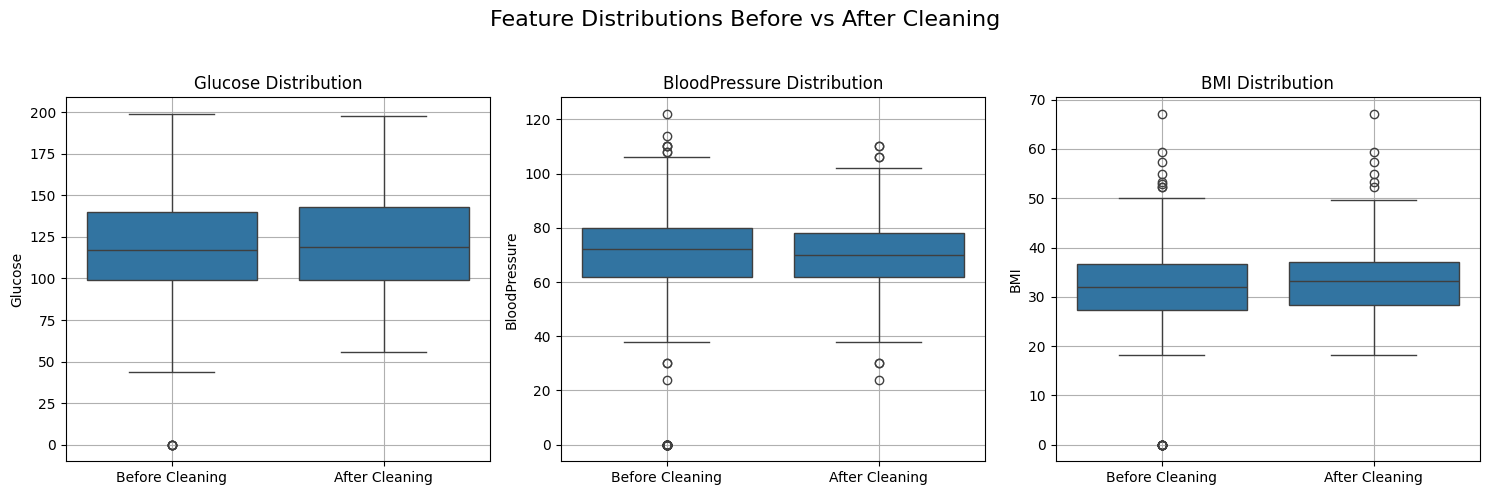

In [5]:
#Boxplot
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_dirty = df.copy()
df_clean = df.copy()
df_clean[zero_cols] = df_clean[zero_cols].replace(0, pd.NA)
df_clean = df_clean.dropna()
df_dirty['Status'] = 'Before Cleaning'
df_clean['Status'] = 'After Cleaning'
df_compare = pd.concat([df_dirty, df_clean])
features_to_plot = ['Glucose', 'BloodPressure', 'BMI']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Status', y=feature, data=df_compare)
    plt.title(f"{feature} Distribution")
    plt.xlabel('')
    plt.grid(True)

plt.suptitle("Feature Distributions Before vs After Cleaning", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

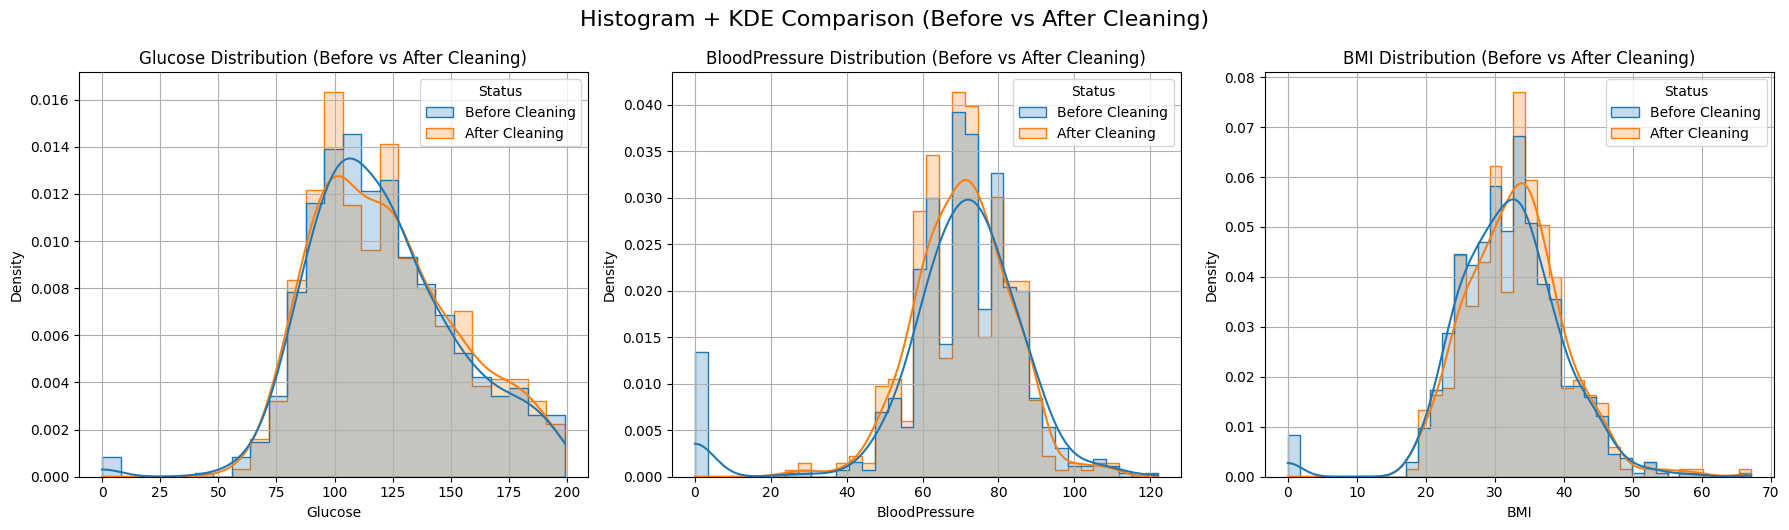

In [7]:
#Histogram
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_dirty = df.copy()
df_clean = df.copy()
df_clean[zero_cols] = df_clean[zero_cols].replace(0, pd.NA)
df_clean = df_clean.dropna()
df_dirty['Status'] = 'Before Cleaning'
df_clean['Status'] = 'After Cleaning'
df_compare = pd.concat([df_dirty, df_clean])
features_to_plot = ['Glucose', 'BloodPressure', 'BMI']
plt.figure(figsize=(18, 5))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df_compare, x=feature, hue='Status', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f"{feature} Distribution (Before vs After Cleaning)")
    plt.grid(True)

plt.tight_layout()
plt.suptitle("Histogram + KDE Comparison (Before vs After Cleaning)", fontsize=16, y=1.05)
plt.show()


<ipython-input-9-27da450e4c2e>:13: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Status', y=feature, data=df_compare, inner='box', scale='width')
<ipython-input-9-27da450e4c2e>:13: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Status', y=feature, data=df_compare, inner='box', scale='width')
<ipython-input-9-27da450e4c2e>:13: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='Status', y=feature, data=df_compare, inner='box', scale='width')


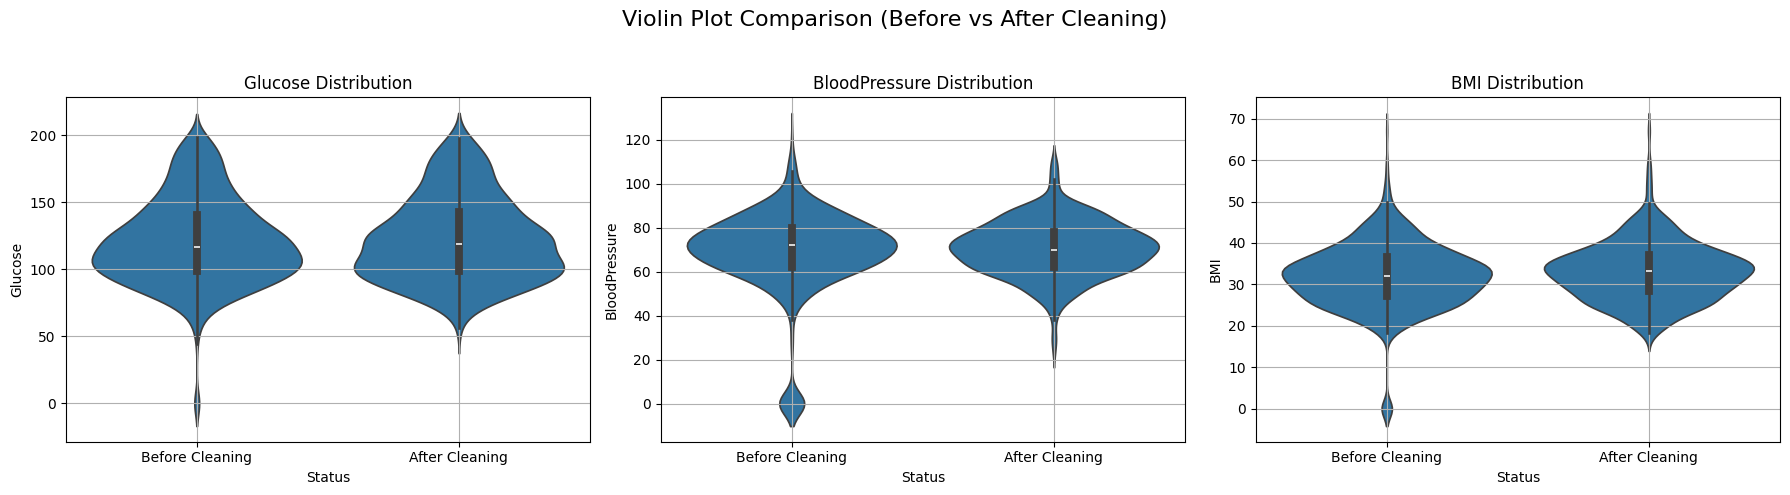

In [9]:
#Density
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_dirty = df.copy()
df_clean = df.copy()
df_clean[zero_cols] = df_clean[zero_cols].replace(0, pd.NA)
df_clean = df_clean.dropna()
df_dirty['Status'] = 'Before Cleaning'
df_clean['Status'] = 'After Cleaning'
df_compare = pd.concat([df_dirty, df_clean])
features_to_plot = ['Glucose', 'BloodPressure', 'BMI']
plt.figure(figsize=(18, 5))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x='Status', y=feature, data=df_compare, inner='box', scale='width')
    plt.title(f"{feature} Distribution")
    plt.grid(True)
plt.suptitle("Violin Plot Comparison (Before vs After Cleaning)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


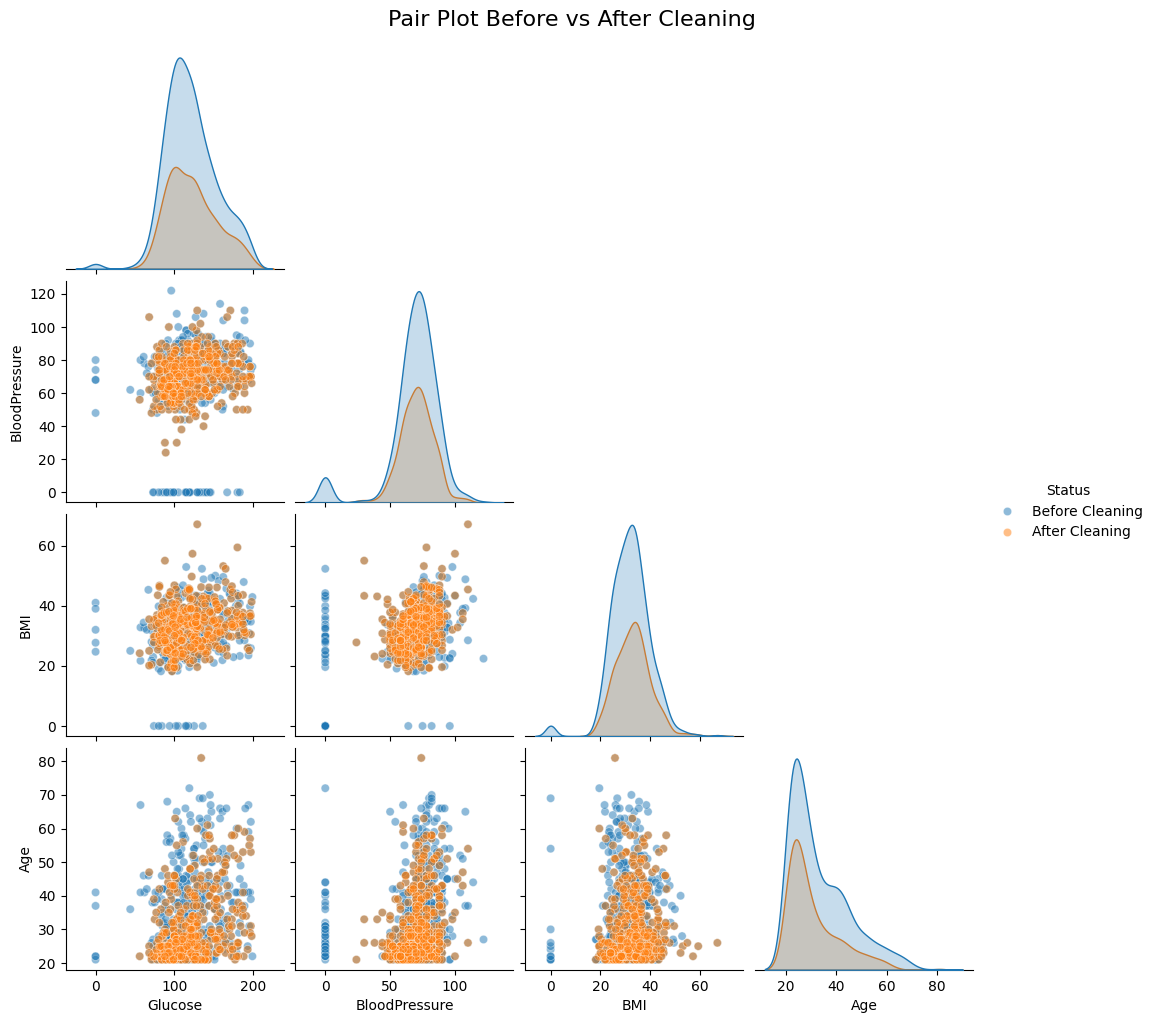

In [10]:
#Pairplot
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_dirty = df.copy()
df_clean = df.copy()
df_clean[zero_cols] = df_clean[zero_cols].replace(0, pd.NA)
df_clean = df_clean.dropna()
df_dirty['Status'] = 'Before Cleaning'
df_clean['Status'] = 'After Cleaning'
df_compare = pd.concat([df_dirty, df_clean])
features_subset = ['Glucose', 'BloodPressure', 'BMI', 'Age', 'Status']
sns.pairplot(df_compare[features_subset], hue='Status', corner=True, plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot Before vs After Cleaning", y=1.02, fontsize=16)
plt.show()

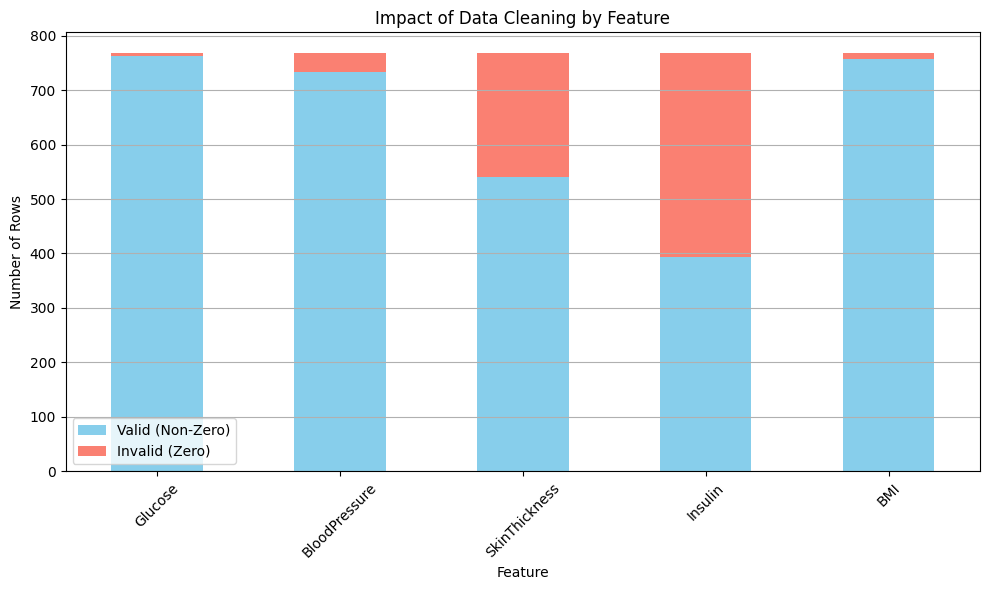

In [11]:
#Cleaning impact
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_rows = len(df)
clean_counts = []
zero_counts = []
for col in zero_cols:
    zero_count = (df[col] == 0).sum()
    clean_count = total_rows - zero_count
    zero_counts.append(zero_count)
    clean_counts.append(clean_count)
cleaning_summary = pd.DataFrame({
    'Feature': zero_cols,
    'Valid (Non-Zero)': clean_counts,
    'Invalid (Zero)': zero_counts})
cleaning_summary.set_index('Feature')[['Valid (Non-Zero)', 'Invalid (Zero)']].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['skyblue', 'salmon'])
plt.title("Impact of Data Cleaning by Feature")
plt.ylabel("Number of Rows")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


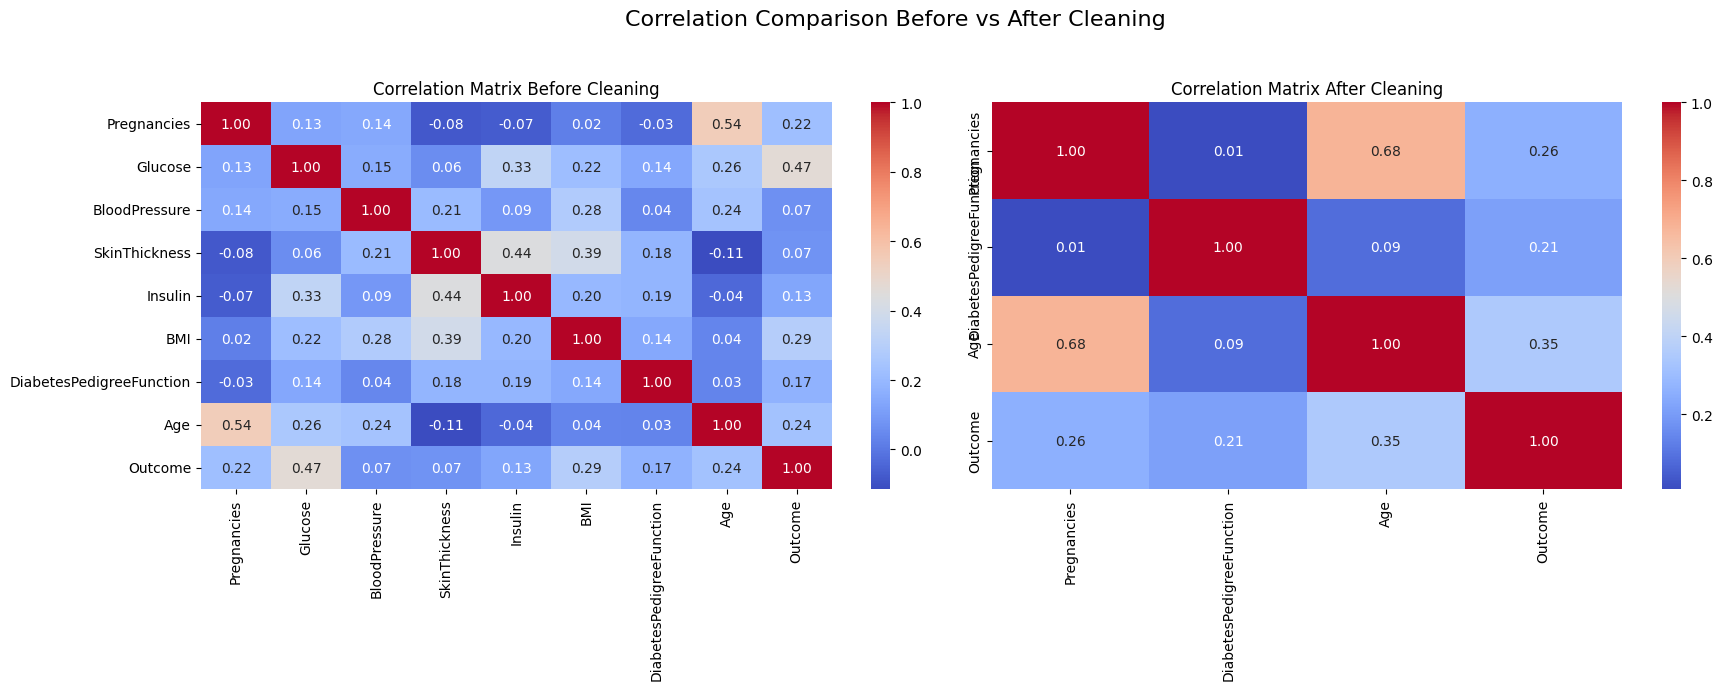

In [12]:
#Correlation/Confusion Matrix
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_dirty = df.copy()
df_clean = df.copy()
df_clean[zero_cols] = df_clean[zero_cols].replace(0, pd.NA)
df_clean = df_clean.dropna()
corr_dirty = df_dirty.corr(numeric_only=True)
corr_clean = df_clean.corr(numeric_only=True)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
sns.heatmap(corr_dirty, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Matrix Before Cleaning")
sns.heatmap(corr_clean, cmap='coolwarm', annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Matrix After Cleaning")
plt.suptitle("Correlation Comparison Before vs After Cleaning", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


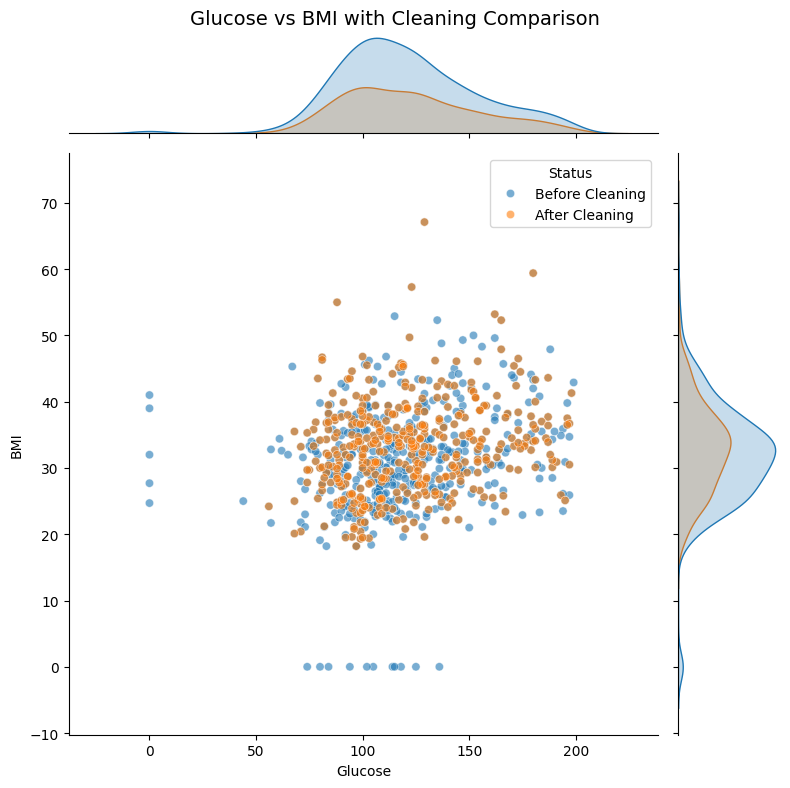

In [15]:
#Comparision
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_dirty = df.copy()
df_clean = df.copy()
df_clean[zero_cols] = df_clean[zero_cols].replace(0, pd.NA)
df_clean = df_clean.dropna()
df_dirty['Status'] = 'Before Cleaning'
df_clean['Status'] = 'After Cleaning'
df_compare = pd.concat([df_dirty, df_clean])
x_feature = 'Glucose'
y_feature = 'BMI'

g = sns.jointplot(
    data=df_compare,
    x=x_feature,
    y=y_feature,
    hue="Status",
    kind="scatter",
    height=8,
    alpha=0.6)
g.fig.suptitle(f"{x_feature} vs {y_feature} with Cleaning Comparison", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


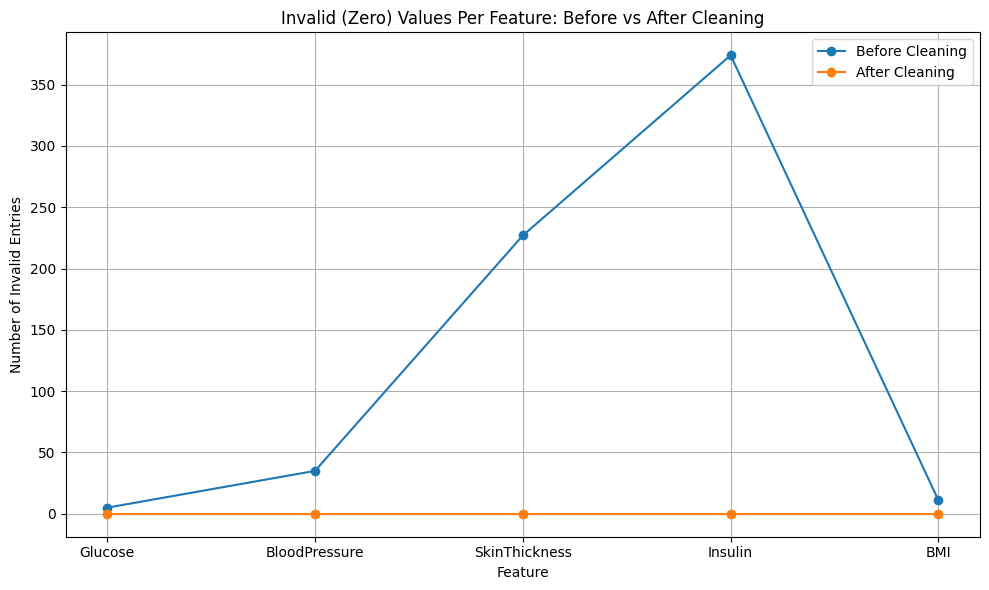

In [16]:
#Line Graph
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zero_counts_before = df[zero_cols].isin([0]).sum()
df_clean = df.copy()
df_clean[zero_cols] = df_clean[zero_cols].replace(0, pd.NA)
df_clean = df_clean.dropna()
zero_counts_after = df_clean[zero_cols].isin([0]).sum()
invalid_summary = pd.DataFrame({
    'Feature': zero_cols,
    'Before Cleaning': zero_counts_before.values,
    'After Cleaning': zero_counts_after.values})
df_long = invalid_summary.melt(id_vars='Feature', var_name='Stage', value_name='Invalid Count')

plt.figure(figsize=(10, 6))
for stage in df_long['Stage'].unique():
    subset = df_long[df_long['Stage'] == stage]
    plt.plot(subset['Feature'], subset['Invalid Count'], marker='o', label=stage)
plt.title("Invalid (Zero) Values Per Feature: Before vs After Cleaning")
plt.xlabel("Feature")
plt.ylabel("Number of Invalid Entries")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

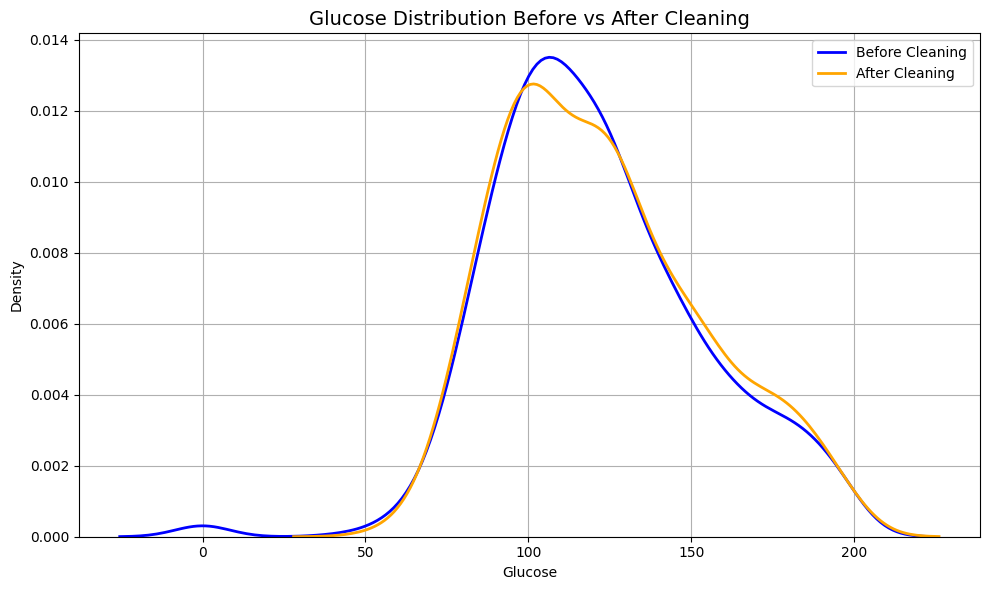

In [17]:
#Distribution
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_dirty = df.copy()
df_clean = df.copy()
df_clean[zero_cols] = df_clean[zero_cols].replace(0, pd.NA)
df_clean = df_clean.dropna()
feature = 'Glucose'

plt.figure(figsize=(10, 6))
sns.kdeplot(df_dirty[feature], label='Before Cleaning', linewidth=2, color='blue')
sns.kdeplot(df_clean[feature], label='After Cleaning', linewidth=2, color='orange')
plt.title(f"{feature} Distribution Before vs After Cleaning", fontsize=14)
plt.xlabel(feature)
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

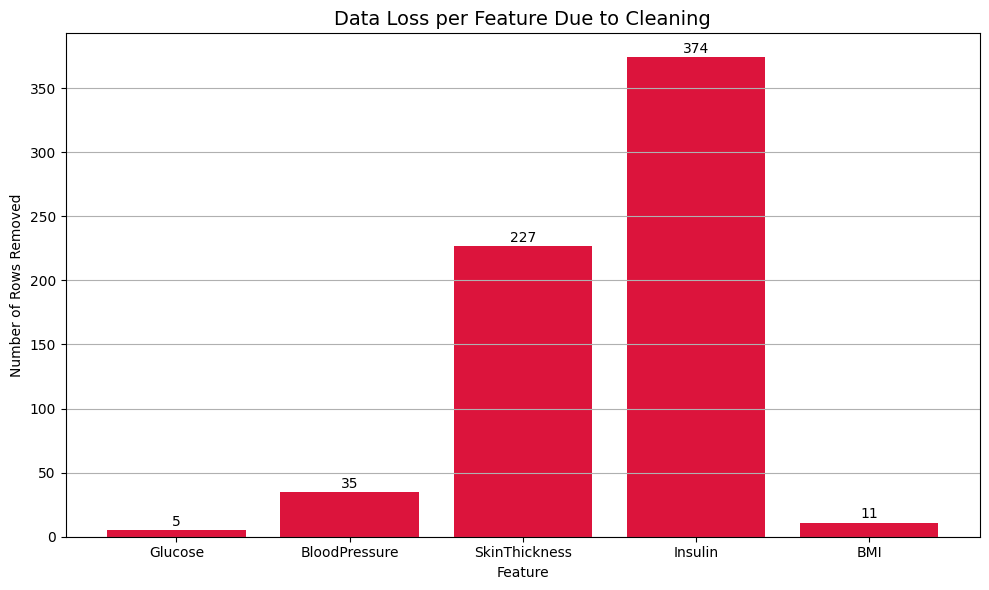

In [18]:
#Cleaning chages
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_rows = len(df)
data_loss = {col: (df[col] == 0).sum() for col in zero_cols}
loss_df = pd.DataFrame(list(data_loss.items()), columns=['Feature', 'Rows Removed'])

plt.figure(figsize=(10, 6))
bars = plt.bar(loss_df['Feature'], loss_df['Rows Removed'], color='crimson')
plt.title("Data Loss per Feature Due to Cleaning", fontsize=14)
plt.xlabel("Feature")
plt.ylabel("Number of Rows Removed")
plt.grid(axis='y')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', fontsize=10)
plt.tight_layout()
plt.show()